In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt



In [102]:
df_airline = pd.read_csv("airline_passengers.csv")

In [103]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [104]:
df_airline=df_airline.dropna(axis=0)

In [105]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [106]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [107]:
df_airline["Month"] = pd.to_datetime(df_airline["Month"])

In [108]:

df_airline.set_index("Month",inplace = True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

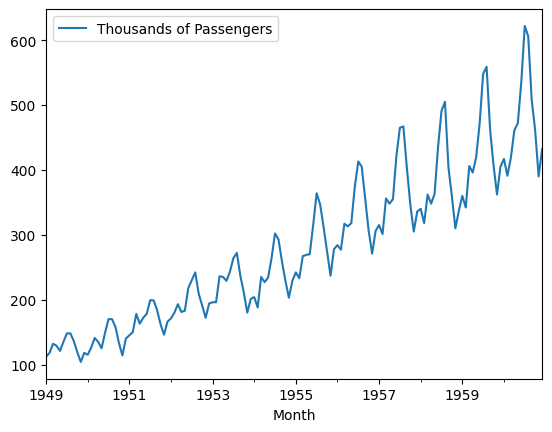

In [109]:
df_airline.plot()

In [110]:
#AD Fulle test function definition

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics: {} ".format(result[0]))
    print("p value: {} ".format(result[1]))
    print("no of lags used : {} ".format(result[2]))
    print("obseravtions used : {} ".format(result[3]))
    if result[1] < 0.05:
        print("strong evidence against the null hypothesis , reject the null hypothesis therefore stationary ") 
    else:
        print("weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary ")


In [111]:
adf_test(df_airline["Thousands of Passengers"])

ADF Statistics: 0.8153688792060463 
p value: 0.991880243437641 
no of lags used : 13 
obseravtions used : 130 
weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary 


In [112]:
# use Techniques differencing
df_airline["Passenger's First Difference"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(1)

In [113]:
df_airline

,Thousands of Passengers,Passenger's First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


In [114]:
adf_test(df_airline["Passenger\'s First Difference"].dropna())

ADF Statistics: -2.8292668241699923 
p value: 0.054213290283826474 
no of lags used : 12 
obseravtions used : 130 
weak evidence against the null hypothesis , accept the null hypothesis therefore not stationary 


In [115]:
df_airline["Passenger's Second_difference"]= df_airline["Passenger\'s First Difference"]-df_airline["Passenger\'s First Difference"].shift(1)

In [116]:
df_airline

,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


In [117]:
adf_test(df_airline["Passenger's Second_difference"].dropna())

ADF Statistics: -16.384231542468516 
p value: 2.7328918500141235e-29 
no of lags used : 11 
obseravtions used : 130 
strong evidence against the null hypothesis , reject the null hypothesis therefore stationary 


In [118]:
##Since it is seasonal data, we need to do it for 12 months(ARIMA doesnt usually work well , SARIMAX works well)
df_airline["Passenger's 12 difference"]= df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12)

In [119]:
adf_test(df_airline["Passenger's 12 difference"].dropna())

ADF Statistics: -3.383020726492481 
p value: 0.011551493085514954 
no of lags used : 1 
obseravtions used : 130 
strong evidence against the null hypothesis , reject the null hypothesis therefore stationary 


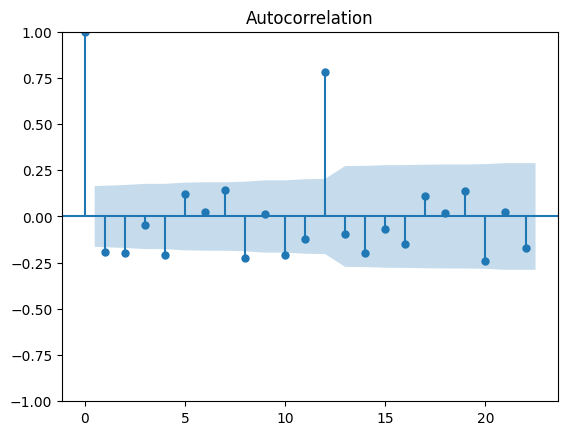

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_airline["Passenger\'s Second_difference"].dropna())

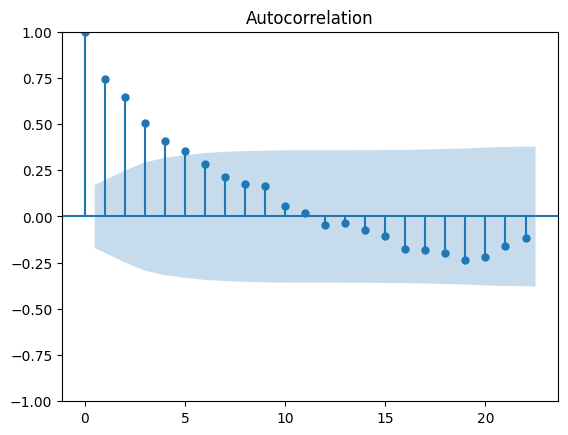

In [ ]:
acf12 = plot_acf(df_airline["Passenger's 12 difference"].dropna())
#from graph , q =5

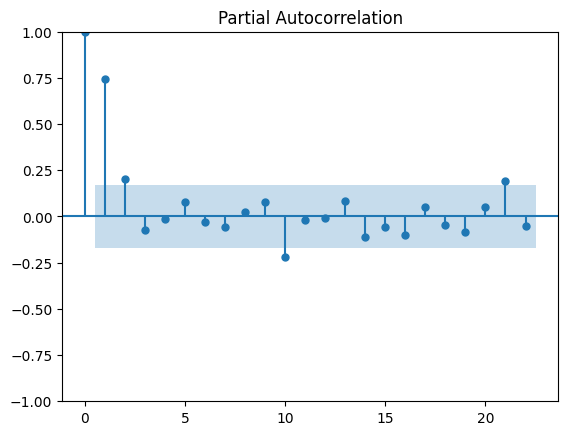

In [125]:
pacf12 = plot_pacf(df_airline["Passenger's 12 difference"].dropna())
#p=2 If it doesnt work fine, then p=10

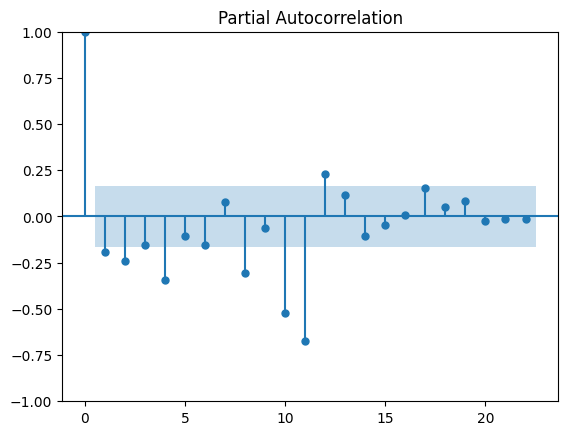

In [ ]:
pacf = plot_pacf(df_airline["Passenger\'s Second_difference"].dropna())

In [126]:
df_airline

,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference,Passenger's 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [137]:
from datetime import datetime , timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end + timedelta(days=1) : test_dataset_end]
 #Its like df_airline[fromdate:todate]

In [141]:
#Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [142]:
test_data


,Thousands of Passengers,Passenger's First Difference,Passenger's Second_difference,Passenger's 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
